<img src="https://drive.google.com/uc?id=1cXtXdAcwedVDbapmz1pj_hULsQrhEcff" width="500"/>

---


In [ ]:
import requests
from io import BytesIO
from PIL import Image
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

<img src="https://benmoseley.blog/uploads/teaching/2024-ESE-DL/images/slides/Slide1.png" width="100%"/>

<img src="https://benmoseley.blog/uploads/teaching/2024-ESE-DL/images/slides/Slide2.png" width="100%"/>

## Excercise:

Let's download an image and look at the raw pixel values.

torch.Size([256, 256])
tensor([[156., 159., 158.,  ..., 151., 152., 152.],
        [160., 154., 157.,  ..., 154., 155., 153.],
        [156., 159., 158.,  ..., 151., 152., 152.],
        ...,
        [114., 132., 123.,  ..., 135., 137., 114.],
        [121., 126., 130.,  ..., 133., 130., 113.],
        [121., 126., 130.,  ..., 133., 130., 113.]])


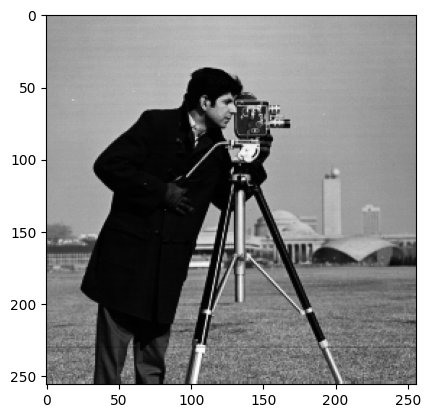

In [ ]:
response = requests.get("https://benmoseley.blog/uploads/teaching/2024-ESE-DL/images/camera.tif")
x = torch.tensor(np.array(Image.open(BytesIO(response.content))), dtype=torch.float32)

# TODO: look at raw pixel values and plot image
print(x.shape)
print(x)
plt.figure()
plt.imshow(x, cmap="grey")
plt.show()

<img src="https://benmoseley.blog/uploads/teaching/2024-ESE-DL/images/slides/Slide3.png" width="100%"/>

<img src="https://benmoseley.blog/uploads/teaching/2024-ESE-DL/images/slides/Slide4.png" width="100%"/>

<img src="https://benmoseley.blog/uploads/teaching/2024-ESE-DL/images/slides/Slide5.png" width="100%"/>

# How would you identify these images?

<table>
    <tr>
        <td>
            <img src="https://benmoseley.blog/uploads/teaching/2024-ESE-DL/images/cat.png" width="1000">
        </td>
        <td>
            <img src="https://benmoseley.blog/uploads/teaching/2024-ESE-DL/images/lena.png" width="1000">
        </td>
        <td>
            <img src="https://benmoseley.blog/uploads/teaching/2024-ESE-DL/images/rocket.jpg" width="1000">
        </td>
    </tr>
</table>

<img src="https://benmoseley.blog/uploads/teaching/2024-ESE-DL/images/scanning-filter.gif" width="80%"/>

<img src="https://benmoseley.blog/uploads/teaching/2024-ESE-DL/images/slides/Slide7.png" width="100%"/>

<img src="https://benmoseley.blog/uploads/teaching/2024-ESE-DL/images/slides/Slide8.png" width="100%"/>

<img src="https://benmoseley.blog/uploads/teaching/2024-ESE-DL/images/slides/Slide9.png" width="100%"/>

<img src="https://benmoseley.blog/uploads/teaching/2024-ESE-DL/images/slides/Slide10.png" width="100%"/>

<img src="https://benmoseley.blog/uploads/teaching/2024-ESE-DL/images/slides/Slide11.png" width="100%"/>

## Excercise:

Let's compute a simple convolution on the camera image above, using PyTorch.

Conv2d(1, 1, kernel_size=(3, 3), stride=(1, 1), bias=False)
tensor([[-0.1828,  0.3294, -0.2668],
        [ 0.1510,  0.2118,  0.1808],
        [ 0.0035,  0.2983, -0.2275]], grad_fn=<SelectBackward0>)


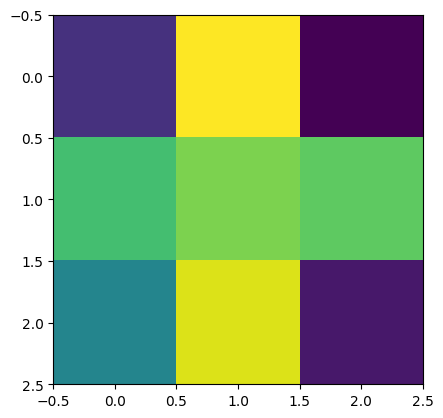

In [ ]:
# TODO: define a convolutional layer with kernel size = 3, no bias, and show the filter weights
conv = torch.nn.Conv2d(in_channels=1, out_channels=1, kernel_size=3, bias=False)
print(conv)
print(conv.weight[0,0])
plt.figure()
plt.imshow(conv.weight.data[0,0])
plt.show()

Now, let's change the weights so that the filter is an "edge detector", and then apply the filter.

output shape: torch.Size([1, 254, 254])


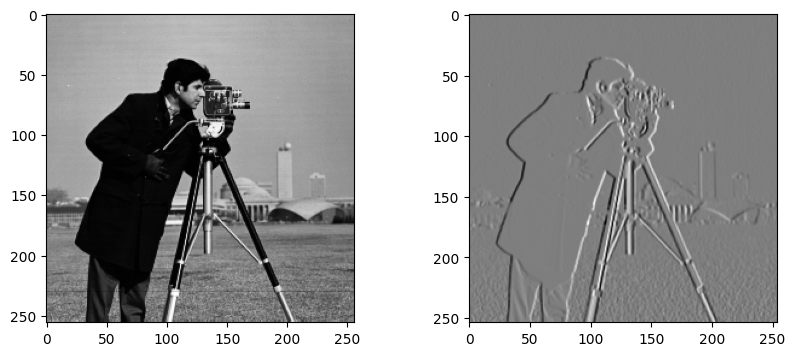

In [ ]:
# TODO: change the filter weights so that we detect horizontal edges in the image, and apply the filter to the image
conv.weight.data = torch.tensor([[-1,0,1],
                                 [-2,0,2],
                                 [-1,0,1]], dtype=torch.float32).view(1,1,3,3)
x = x.view(1,256,256)
h = conv(x)
print(f"output shape: {h.shape}")
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.imshow(x[0], cmap="grey")
plt.subplot(1,2,2)
plt.imshow(h[0].detach(), cmap="grey")
plt.show()

<img src="https://benmoseley.blog/uploads/teaching/2024-ESE-DL/images/slides/Slide12.png" width="100%"/>

<img src="https://benmoseley.blog/uploads/teaching/2024-ESE-DL/images/conv-dimensions.png" width="100%"/>

## Excercise

Let's extend the convolutional layer above so that we output 3 channels (apply 3 filters) instead of 1.

In [ ]:
# TODO: change the layer above so that we output 3 channels, and print the shape of the input, filter, and output
conv = torch.nn.Conv2d(in_channels=1, out_channels=3, kernel_size=3, bias=False)
x = x.view(1,256,256)# (in channels, height, width)
print(f"input shape: {x.shape}")
print(f"filter shape: {conv.weight.shape}")# (out channels, in channels, kernel size x, kernel size y)
h = conv(x)# (out channels, height, width)
print(f"output shape: {h.shape}")

input shape: torch.Size([1, 256, 256])
filter shape: torch.Size([3, 1, 3, 3])
output shape: torch.Size([3, 254, 254])


# Convolutions - extensions
<table>
    <tr>
        <td>
            <img src="https://benmoseley.blog/uploads/teaching/2024-ESE-DL/images/no_padding_no_strides.gif" width="500">
            <figcaption>Vanilla convolution</figcaption>
        </td>
        <td>
            <img src="https://benmoseley.blog/uploads/teaching/2024-ESE-DL/images/no_padding_strides.gif" width="500">
            <figcaption>Stride = 2</figcaption>
        </td>
        <td>
            <img src="https://benmoseley.blog/uploads/teaching/2024-ESE-DL/images/same_padding_no_strides.gif" width="500">
            <figcaption>Padding = 1</figcaption>
        </td>
        <td>
            <img src="https://benmoseley.blog/uploads/teaching/2024-ESE-DL/images/dilation.gif" width="500">
            <figcaption>Dilation = 2</figcaption>
        </td>
    </tr>
</table>


source: https://github.com/vdumoulin/conv_arithmetic

## Excercise:

Next, let's experiment with different settings for the convolutional layer, and see how that changes the output shape.

In [ ]:
# TODO: change the settings for the convolutional layer above and predict how the output shape will change
# How does the output shape change with `kernel_size`, `stride`, `padding`, and `dilation`?

<img src="https://benmoseley.blog/uploads/teaching/2024-ESE-DL/images/slides/Slide14.png" width="100%"/>

<img src="https://benmoseley.blog/uploads/teaching/2024-ESE-DL/images/slides/Slide15.png" width="100%"/>

## Excercise:

Now, we are ready to define a convolutional neural network in PyTorch. We will train it to classify MNIST digits.

Step 1: first, we need to download the MNIST dataset.

60000 images in training dataset
10000 images in test dataset
torch.Size([1, 28, 28])
5


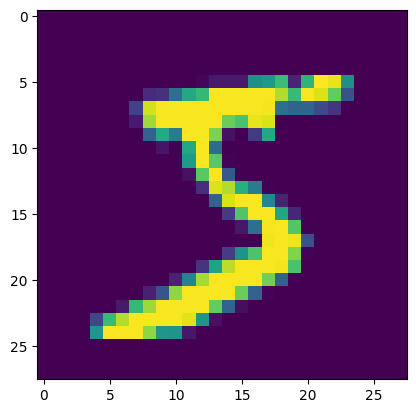

In [ ]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))
    ])
train_dataset = datasets.MNIST('./', train=True, download=True, transform=transform)
test_dataset = datasets.MNIST('./', train=False, download=True, transform=transform)

# TODO: plot an image from the training dataset, and print the size of the two datasets
print(f"{len(train_dataset)} images in training dataset")
print(f"{len(test_dataset)} images in test dataset")
x,target = train_dataset[0]# get example image
print(x.shape)
print(target)
plt.figure()
plt.imshow(x[0])
plt.show()

Step 2: next, we need to define a convolutional neural network in PyTorch. We will use the LeNet5 architecture:

(Lecun et al., (1998). Gradient-based learning applied to document recognition. Proceedings of the IEEE)

# LeNet5
<img src="https://benmoseley.blog/uploads/teaching/2024-ESE-DL/images/lenet5.png" width="100%"/>

Here is the PyTorch machinery we can use to help us:

- [`nn.Conv2d`](https://pytorch.org/docs/stable/generated/torch.nn.Conv2d.html): Defines and initialises convolutional layers
- [`nn.MaxPool2d`](https://pytorch.org/docs/stable/generated/torch.nn.MaxPool2d.html): Defines and initialises max pooling layers
- [`nn.Linear`](https://pytorch.org/docs/stable/generated/torch.nn.Linear.html): Defines and initialises linear (fully connected) layers
- [`torch.nn.LogSoftmax`](https://pytorch.org/docs/stable/generated/torch.nn.LogSoftmax.html): Defines log softmax operation for output classification layer

In [ ]:
class LeNet5(nn.Module):
    def __init__(self):
        super().__init__()

        #TODO: define the LeNet5 layers
        self.c1 = nn.Conv2d(1, 6, kernel_size=5, stride=1, padding=2) # define a 2D convolutional layer
        self.s2 = nn.MaxPool2d(kernel_size=2, stride=2)               # define a maxpool layer
        self.c3 = nn.Conv2d(6, 16, kernel_size=5, stride=1)           # another 2D convolutional layer
        self.s4 = nn.MaxPool2d(kernel_size=2, stride=2)               # another maxpool layer
        self.l5 = nn.Linear(16*5*5, 10)                               # linear classification head
        self.log_softmax = torch.nn.LogSoftmax(dim=1)                 # (log) softmax output
        self.act = nn.ReLU()                                          # activation function

    def forward(self, x):

        # TODO: define the forward network function
        x = self.act(self.c1(x))                                      # activate pass through the first layer
        #print(x.shape)
        x = self.act(self.s2(x))                                      # activate pass through the second layer
        #print(x.shape)
        x = self.act(self.c3(x))                                      # activate pass through the third layer
        #print(x.shape)
        x = self.act(self.s4(x))                                      # activate pass through the fourth layer
        #print(x.shape)
        x = x.view(-1, x.size(1)*x.size(2)*x.size(3))                 # flatten inputs for linear layer
        x = self.l5(x)                                                # linear classification head
        x = self.log_softmax(x)                                       # output (log) softmax probabilities of each class
        return x

    def middle_feature(self, x):
        x = self.act(self.c1(x))
        x = self.act(self.s2(x))
        x = self.c3(x)
        return x

torch.manual_seed(123)
model = LeNet5()

# TODO: check the output dimensions makes sense, and print the shapes of the hidden layer outputs
y = model(train_dataset[0][0].unsqueeze(0))
print(y)
print(model)

tensor([[-2.1950, -2.5704, -2.1952, -2.7434, -2.0778, -2.5516, -2.2636, -2.2714,
         -2.4392, -1.9738]], grad_fn=<LogSoftmaxBackward0>)
LeNet5(
  (c1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
  (s2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (c3): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (s4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (l5): Linear(in_features=400, out_features=10, bias=True)
  (log_softmax): LogSoftmax(dim=1)
  (act): ReLU()
)


Step 3: now, we can train the network using a cross entropy (negative log likelihood) loss function, and evaluate its performance on the test set.

In [ ]:
train_loader = torch.utils.data.DataLoader(train_dataset,batch_size=64)
test_loader = torch.utils.data.DataLoader(test_dataset,batch_size=256)

def train(model, train_loader, epochs=1):
    optimizer = optim.Adam(model.parameters(), lr=1e-3)
    criterion = torch.nn.NLLLoss()# negative log likelihood loss
    model.train()
    for epoch in range(epochs):
        for batch_idx, (data, target) in enumerate(train_loader):

            # TODO: optimise model
            optimizer.zero_grad()
            logp = model(data)
            loss = criterion(logp, target)
            loss.backward()
            optimizer.step()

            if batch_idx % 100 == 0:
                print('Train Epoch: {} [{}/{}]\tLoss: {:.6f}'.format(
                    epoch, batch_idx * len(data), len(train_loader.dataset), loss.item()))

train(model, train_loader)

Train Epoch: 0 [0/60000]	Loss: 2.325207
Train Epoch: 0 [6400/60000]	Loss: 0.265797
Train Epoch: 0 [12800/60000]	Loss: 0.153470
Train Epoch: 0 [19200/60000]	Loss: 0.221521
Train Epoch: 0 [25600/60000]	Loss: 0.076381
Train Epoch: 0 [32000/60000]	Loss: 0.160723
Train Epoch: 0 [38400/60000]	Loss: 0.068125
Train Epoch: 0 [44800/60000]	Loss: 0.201379
Train Epoch: 0 [51200/60000]	Loss: 0.178582
Train Epoch: 0 [57600/60000]	Loss: 0.233305



Test set: Average Accuracy: 9746/10000 (97%)



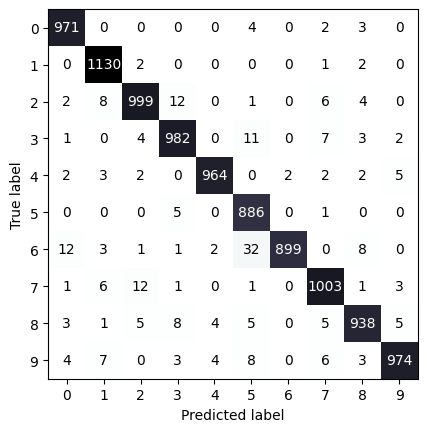

In [ ]:
def evaluate(model, test_loader):
    "Get model predictions on test dataset"
    model.eval()
    preds, targets = [],[]
    with torch.no_grad():
        for data, target in test_loader:

            # TODO: compute the class probability predictions of the model, and get the most likely class
            logp = model(data)
            pred = logp.argmax(dim=1)# get the index of the max log-probability

            preds.append(pred)
            targets.append(target)
    preds = torch.concat(preds)
    targets = torch.concat(targets)

    # TODO: compute the average accuracy on the test set
    correct = preds.eq(targets).sum().item()
    print('\nTest set: Average Accuracy: {}/{} ({:.0f}%)\n'.format(
          correct, len(test_loader.dataset), 100.*correct/len(test_loader.dataset)))

    plt.figure()
    ConfusionMatrixDisplay.from_predictions(targets, preds, ax=plt.gca(), colorbar=False, cmap='bone_r')
    plt.show()

evaluate(model, test_loader)

<img src="https://benmoseley.blog/uploads/teaching/2024-ESE-DL/images/slides/Slide16.png" width="100%"/>

<img src="https://benmoseley.blog/uploads/teaching/2024-ESE-DL/images/slides/Slide17.png" width="100%"/>

<img src="https://benmoseley.blog/uploads/teaching/2024-ESE-DL/images/slides/Slide18.png" width="100%"/>

## Excercise
Let's try to interpret what the convolutional neural network has learned.

We can do this by using many different visualisation techniques.

#### Visualising feature maps
A first and easy approach is to visualise the feature maps (outputs) of each convolutional layer.

torch.Size([6, 28, 28])


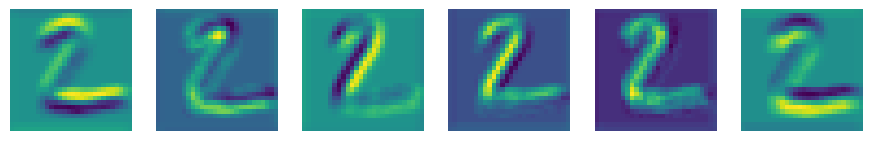

In [ ]:
x,target = test_dataset[1]

# TODO: plot the feature maps (outputs) for first convolutional layer (model.c1).
# What is each feature sensitive to in the input image?
features = model.c1(x.unsqueeze(0))[0]# extract hidden features
print(features.shape)# (feature, height, width)
plt.figure(figsize=(11,4))
for i,f in enumerate(features):
    plt.subplot(1, len(features), i+1)
    plt.imshow(f.detach())
    plt.axis("off")
plt.show()

#### Maximising feature activations
Another approach is to change the input image pixel values such that specific feature is maximised.
This gives us an image which shows us what "maximally activates" that feature.

Maximising feature 1 of 16..
Maximising feature 2 of 16..
Maximising feature 3 of 16..
Maximising feature 4 of 16..
Maximising feature 5 of 16..
Maximising feature 6 of 16..
Maximising feature 7 of 16..
Maximising feature 8 of 16..
Maximising feature 9 of 16..
Maximising feature 10 of 16..
Maximising feature 11 of 16..
Maximising feature 12 of 16..
Maximising feature 13 of 16..
Maximising feature 14 of 16..
Maximising feature 15 of 16..
Maximising feature 16 of 16..


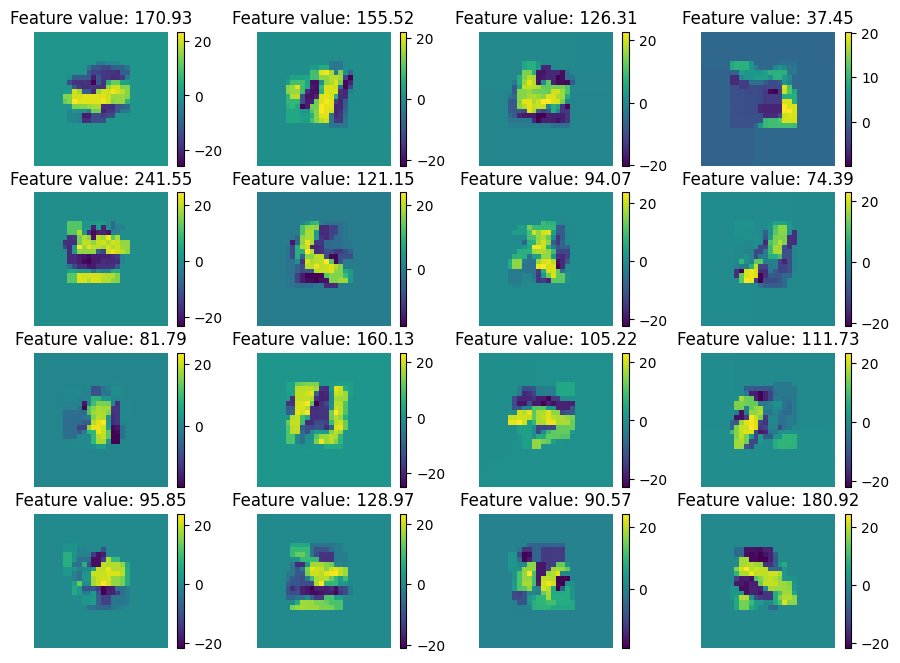

In [ ]:
def total_variation(image):
    diff_h = torch.abs(image[:, :, :-1, :] - image[:, :, 1:, :])
    diff_w = torch.abs(image[:, :, :, :-1] - image[:, :, :, 1:])
    total_variation_loss = torch.sum(diff_h) + torch.sum(diff_w)
    return total_variation_loss

plt.figure(figsize=(11,8))
for fi in range(16):
    print(f"Maximising feature {fi+1} of {16}..")
    torch.manual_seed(123)

    # TODO: optimise a randomly initialised input image to maximally activate the central pixel in the fi feature map of model.c3
    # use TV regularisation with a coefficient of 1.5e-2 to help smoooth the image and adam with lrate=1e-2
    # plot the maximised image and feature value
    x = torch.nn.Parameter(torch.randn(1,1,28,28))# start with a random noise image
    optimizer = optim.Adam([x], lr=1e-2)# optimise image pixel values
    for i in range(2000):
        optimizer.zero_grad()
        f = model.middle_feature(x)
        loss = -f[0,fi,4,4] + 1.5e-2*total_variation(x)# maximise the feature value at the central pixel location
        loss.backward()
        optimizer.step()
    plt.subplot(4,4,fi+1)
    plt.imshow(x[0,0].detach())
    plt.title(f"Feature value: {f[:,fi,4,4].item():.2f}")
    plt.axis("off")
    plt.colorbar()
plt.show()

#### Saliency map

Another approach is to generate a "saliency map": this shows which pixels in the image the class prediction is most sensitive to.
More precisely, we compute and plot the gradient of the class prediction with respect to each pixel in the input image.

2 2


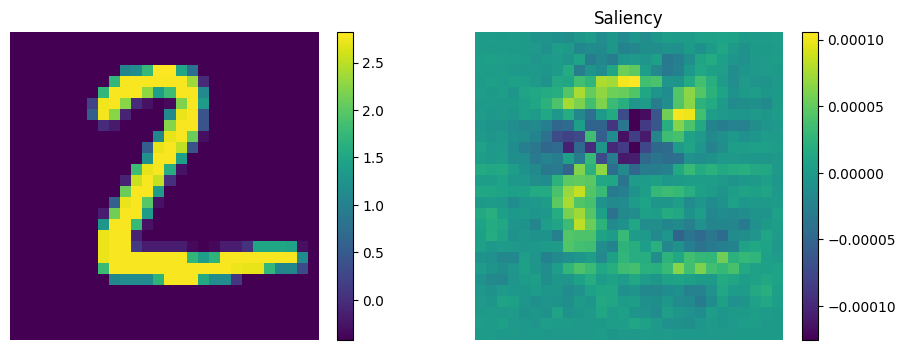

In [ ]:
x,target = test_dataset[1]

# TODO: compute the gradient of the class prediction wrt the input image pixel values, and plot the saliency map
x.requires_grad_(True)
logp = model(x.unsqueeze(0))[0]
pred = logp.argmax().item()
print(pred, target)
grad = torch.autograd.grad(logp[pred], x)[0]# gradient of predicted class probability wrt image
# positive grad means probability of class increases if pixel value increases
plt.figure(figsize=(11,4))
plt.subplot(1,2,1)
plt.imshow(x[0].detach())
plt.axis("off")
plt.colorbar()
plt.subplot(1,2,2)
plt.title("Saliency")
plt.imshow(grad[0])
plt.axis("off")
plt.colorbar()
plt.show()

<img src="https://benmoseley.blog/uploads/teaching/2024-ESE-DL/images/slides/Slide19.png" width="100%"/>

<img src="https://benmoseley.blog/uploads/teaching/2024-ESE-DL/images/slides/Slide20.png" width="100%"/>

<img src="https://benmoseley.blog/uploads/teaching/2024-ESE-DL/images/slides/Slide21.png" width="100%"/>

# Summary
- Convolutional layers learn to recognise **spatial features** in images
- Deep convolutional networks learn **hierarchical** feature representations
- CNNs are used as **common framework** for many computer vision tasks


More materials:
- [But, what is a convolution? 3Blue1Brown video](https://www.youtube.com/watch?v=KuXjwB4LzSA)
- [Introtodeeplearning.com Deep Computer Vision lecture](https://introtodeeplearning.com/) (which this notebook draws inspiration from)

---